In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol for Solana
sol_ticker = yf.Ticker("SOL-USD")
csv_file = "sol.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Solana
sol = sol_ticker.history(period="max")
sol.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
sol = pd.read_csv(csv_file, index_col=0)
sol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0
2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0


<Axes: xlabel='Date'>

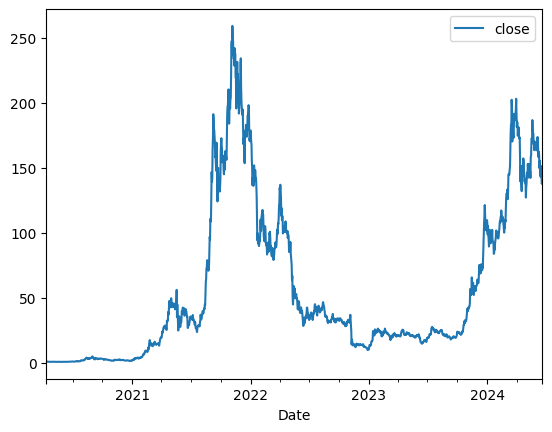

In [3]:
# Convert index to datetime
sol.index = pd.to_datetime(sol.index)

# Remove unnecessary columns
del sol["Dividends"]
del sol["Stock Splits"]

# Convert column names to lowercase
sol.columns = [c.lower() for c in sol.columns]

# Plot the closing price
sol.plot.line(y="close", use_index=True)


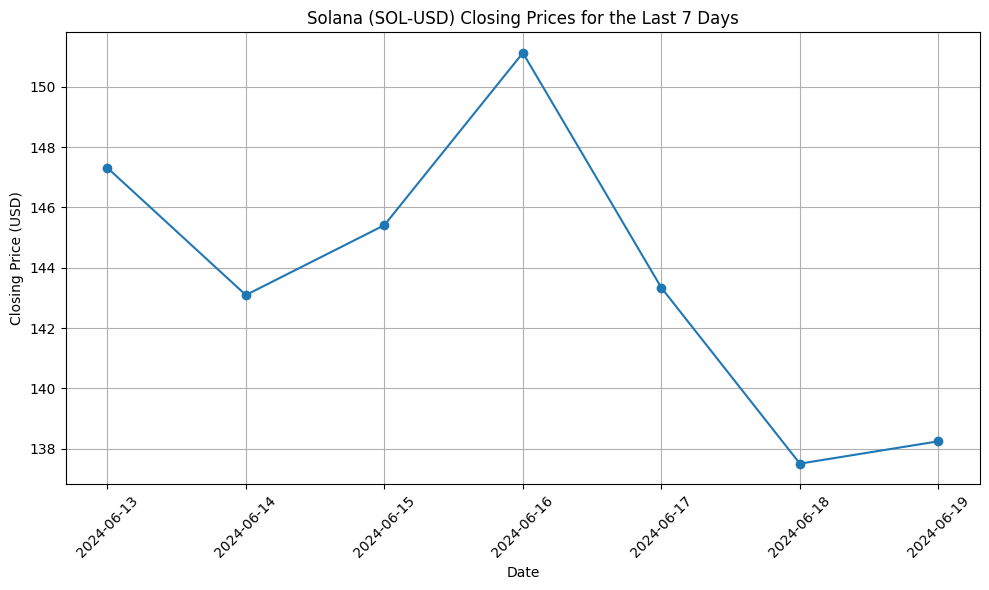

In [4]:
last_seven_days = sol[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days.index, last_seven_days['close'], marker='o')
plt.title('Solana (SOL-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
wiki = pd.read_csv("solana_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.0,0.0,0.0
2009-04-07,0.0,0.0,0.0
2009-04-08,0.0,0.0,0.0
2009-04-09,0.0,0.0,0.0
2009-04-10,0.0,0.0,0.0
...,...,...,...
2024-06-15,0.0,0.0,0.0
2024-06-16,0.0,0.0,0.0
2024-06-17,0.0,0.0,0.0
2024-06-18,0.0,0.0,0.0


In [6]:
# Assuming 'sol' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
sol = sol.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
sol["tomorrow"] = sol["close"].shift(-1)
sol["target"] = (sol["tomorrow"] > sol["close"]).astype(int)
sol["target"].value_counts()


target
0    767
1    765
Name: count, dtype: int64

In [7]:
sol

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0,0.0,0.776819,0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0,0.0,0.882507,1
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0,0.0,0.777832,0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0,0.0,0.661925,0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0,0.0,0.646651,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0,0.0,151.125504,1
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0,0.0,143.334274,0
2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0,0.0,137.503998,0
2024-06-18 00:00:00+00:00,143.314697,143.610657,130.289078,137.503998,4046511952,0.0,0.0,0.0,138.244797,1


In [8]:
sol.to_csv('solSentiment.csv')

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = sol.iloc[:-200]
test = sol.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [10]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5238095238095238

In [11]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [12]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [13]:
preds

2023-12-03 00:00:00+00:00    1
2023-12-04 00:00:00+00:00    1
2023-12-05 00:00:00+00:00    1
2023-12-06 00:00:00+00:00    1
2023-12-07 00:00:00+00:00    1
                            ..
2024-06-15 00:00:00+00:00    1
2024-06-16 00:00:00+00:00    0
2024-06-17 00:00:00+00:00    1
2024-06-18 00:00:00+00:00    1
2024-06-19 00:00:00+00:00    1
Length: 200, dtype: int32

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(sol, model, predictors)

In [16]:
predictions["predictions"].value_counts()

predictions
1    227
0    210
Name: count, dtype: int64

In [17]:
precision_score(predictions["target"], predictions["predictions"])

0.4581497797356828

In [18]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [19]:
sol, new_predictors = compute_rolling(sol.copy())
sol

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0,0.0,0.776819,0,...,NaN,1.000000,0.0,NaN,1.000000,0.0,NaN,1.000000,0.000000,NaN
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0,0.0,0.882507,1,...,0.0,0.899162,0.0,0.000000,0.899162,0.0,0.000000,0.899162,0.000000,0.000000
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0,0.0,0.777832,0,...,0.5,1.014228,0.0,0.500000,1.014228,0.0,0.500000,1.014228,0.000000,0.500000
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0,0.0,0.661925,0,...,0.5,0.918280,0.0,0.333333,0.918280,0.0,0.333333,0.918280,0.000000,0.333333
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0,0.0,0.646651,0,...,0.0,0.817164,0.0,0.250000,0.817164,0.0,0.250000,0.817164,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,143.074081,145.540970,143.023651,145.412216,1065293341,0.0,0.0,0.0,151.125504,1,...,0.5,0.958967,0.0,0.428571,0.937183,0.0,0.433333,1.742923,0.114429,0.504110
2024-06-16 00:00:00+00:00,145.417969,151.125504,143.179535,151.125504,1147997523,0.0,0.0,0.0,143.334274,0,...,1.0,1.007042,0.0,0.428571,0.971995,0.0,0.450000,1.803380,0.113242,0.504110
2024-06-17 00:00:00+00:00,151.137238,151.584778,140.138809,143.334274,2244770232,0.0,0.0,0.0,137.503998,0,...,0.5,0.969516,0.0,0.428571,0.921760,0.0,0.433333,1.703285,0.111689,0.504110
2024-06-18 00:00:00+00:00,143.314697,143.610657,130.289078,137.503998,4046511952,0.0,0.0,0.0,138.244797,1,...,0.0,0.940922,0.0,0.428571,0.884757,0.0,0.416667,1.627568,0.110137,0.501370


In [20]:
predictions = backtest(sol, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5531914893617021

In [21]:
prob_inc = (predictions["predictions"] == 1).mean()
prob_dec = 1 - prob_inc
print(f"Probability of increase: {prob_inc:.4f}")
print(f"Probability of decrease: {prob_dec:.4f}")

Probability of increase: 0.2151
Probability of decrease: 0.7849


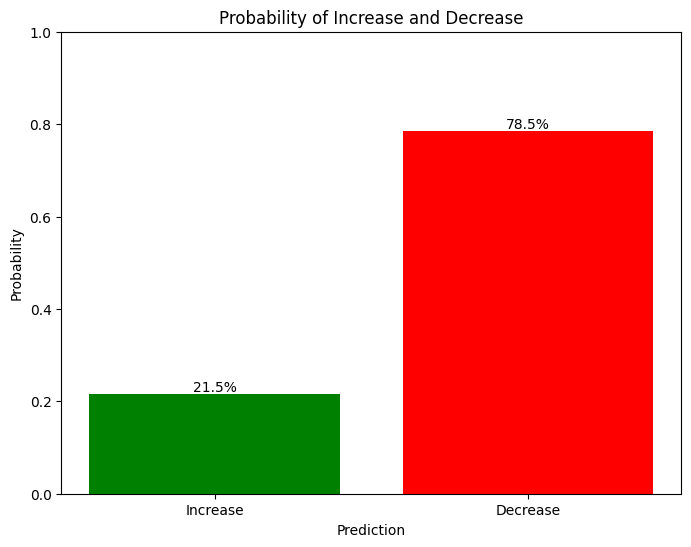

In [22]:
import matplotlib.pyplot as plt

prob_inc_pct = prob_inc * 100
prob_dec_pct = prob_dec * 100

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(["Increase", "Decrease"], [prob_inc, prob_dec], color=['green', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Probability of Increase and Decrease')

# Display percentages on top of bars
for bar, pct in zip(bars, [prob_inc_pct, prob_dec_pct]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()